# without scaling data

## seleccting data

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [4]:
import pandas as pd
from joblib import load
from pathlib import Path

# --- Configuration ---
scaler_path = Path('/content/drive/MyDrive/Data-science-project/journal-article/standard_scaler.joblib')

# Load the DataFrame. It contains 16 columns (features + 'label_encoded').
df_scaled = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/global_data.csv')

# --- Reverting the Scaling ---
try:
    scaler = load(scaler_path)
    print("StandardScaler loaded successfully.")
except FileNotFoundError:
    print(f"Error: Scaler file not found at {scaler_path}")
    scaler = None
except Exception as e:
    print(f"An error occurred while loading the scaler: {e}")
    scaler = None

if scaler is not None:
    # Separate the features from the target label
    # This is the crucial step to fix the error
    feature_cols = [c for c in df_scaled.columns if c != 'label_encoded']
    df_scaled_features = df_scaled[feature_cols]

    # Perform inverse transformation ONLY on the scaled features
    original_data_array = scaler.inverse_transform(df_scaled_features)

    # Create a DataFrame for the reverted features
    df_reverted_features = pd.DataFrame(original_data_array, columns=feature_cols)

    # Combine the reverted features with the original, unscaled 'label_encoded' column
    df_original = pd.concat([df_reverted_features, df_scaled['label_encoded']], axis=1)

    print("\n--- Scaled Data (Features only) ---")
    print(df_scaled_features.head())

    print("\n--- Original (Reverted) Data ---")
    print(df_original.head())

    df_original.to_csv('/content/drive/MyDrive/Data-science-project/journal-article/global_data_not_scaled.csv', index=False)

StandardScaler loaded successfully.

--- Scaled Data (Features only) ---
    avg_ipt  bytes_in  bytes_out  num_pkts_in  num_pkts_out   entropy  \
0 -0.034063 -0.198464  -0.521970    -0.261112     -0.284016 -1.302101   
1 -0.034063 -0.198464   1.710874    -0.261112      0.241871 -0.401739   
2 -0.034063 -0.198464  -0.500382    -0.261112     -0.225584  0.387283   
3 -0.034060 -0.090518  -0.492517     0.319441      0.008144  0.669043   
4 -0.034063 -0.198464  -0.008632    -0.261112     -0.167152  0.800991   

   total_entropy  src_port  dest_port    proto  duration    src_ip   dest_ip  \
0      -0.239583 -1.518713   1.086840 -0.04713 -0.139679 -0.218937 -0.078514   
1       0.350688  0.231615  -0.272775 -0.04713 -0.139659 -0.218937 -0.078514   
2      -0.228875  0.900498  -0.775411 -0.04713 -0.139559 -0.218937 -0.078514   
3      -0.198441  0.544709  -0.775411 -0.04713  0.075428 -0.218937 -0.078514   
4       0.077401 -0.012531  -0.272775 -0.04713 -0.139678 -0.218937 -0.078514   

   time

display basic information

## visualize data

      avg_ipt    bytes_in     bytes_out   num_pkts_in  num_pkts_out  \
0    0.049994   -0.000020     -0.000175 -3.983559e-08           1.0   
1    0.049994   -0.000020  14479.999601 -3.983559e-08          10.0   
2    0.049994   -0.000020    139.999716 -3.983559e-08           2.0   
3  147.105241  269.999995    190.999994  7.000000e+00           6.0   
4    0.049994   -0.000020   3329.000001 -3.983559e-08           3.0   

        entropy  total_entropy      src_port     dest_port  proto  \
0  1.505602e-07      -0.000574   9200.000935  32882.001791    6.0   
1  2.088322e+00   30238.903977  43268.000124   9199.999657    6.0   
2  3.918398e+00     548.575874  56287.000380    444.999755    6.0   
3  4.571918e+00    2107.653666  49361.998608    444.999755    6.0   
4  4.877961e+00   16238.731361  38516.000017   9199.999657    6.0   

       duration      src_ip     dest_ip    time_start      time_end  \
0  4.178477e-08  785.999806  786.000042  1.612153e+15  1.612153e+15   
1  1.079660e-04 

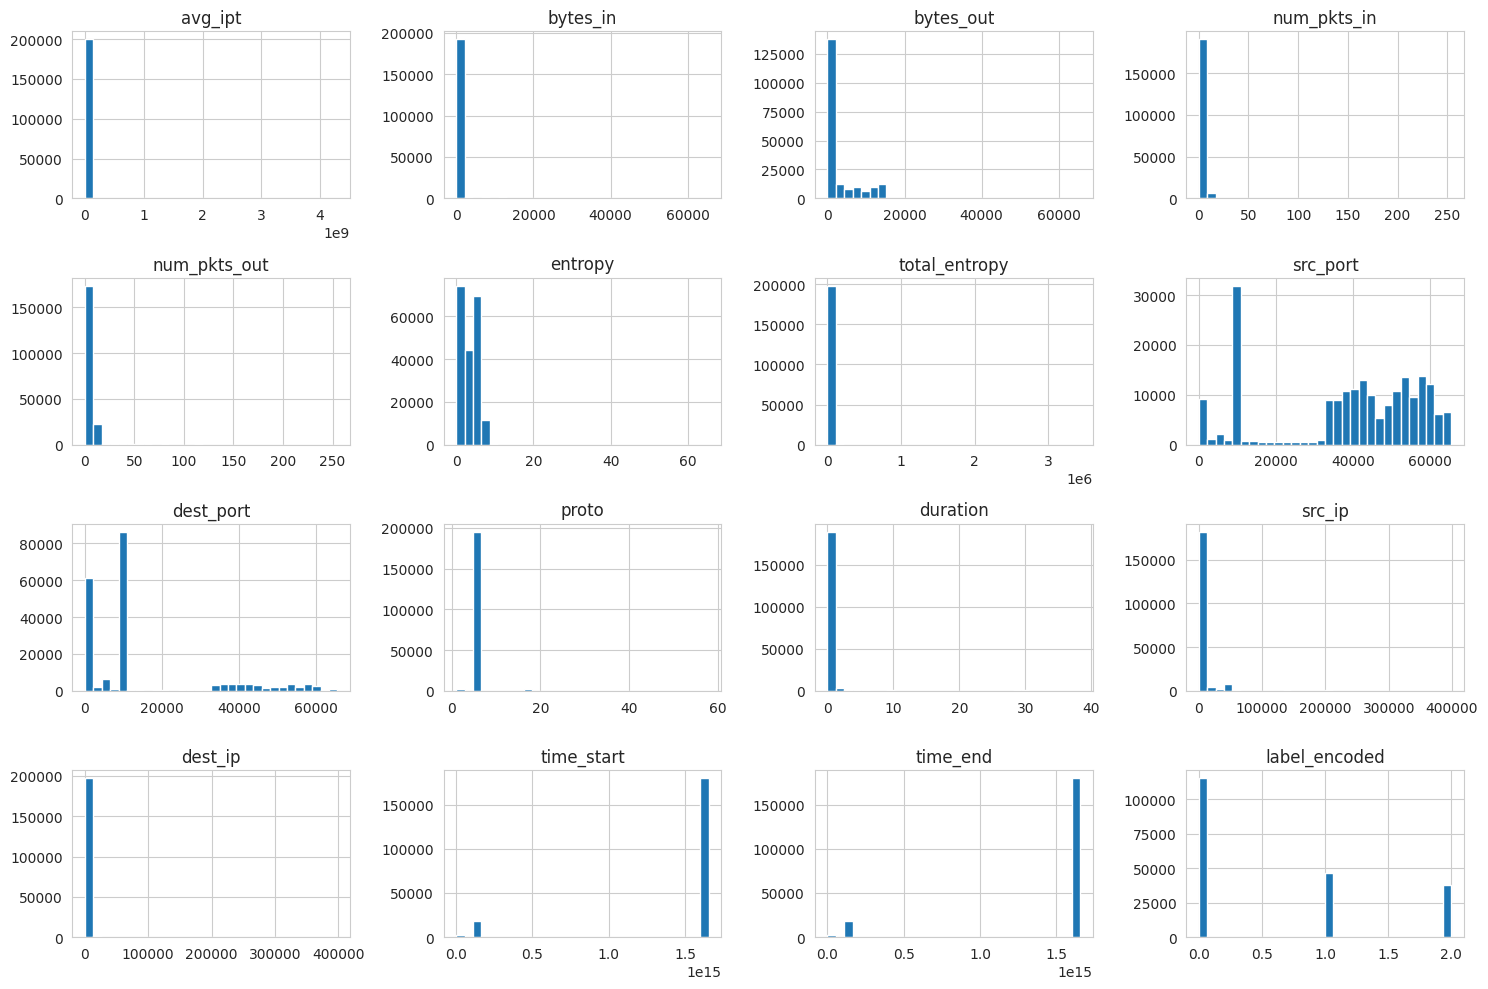

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_global_data = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/global_data_not_scaled.csv')
print(df_global_data.head())

# Select only numerical columns for plotting
numerical_cols = df_global_data.select_dtypes(include=['float64', 'int64']).columns

# Set the style for the plots
sns.set_style("whitegrid")

# Plot histograms for numerical columns
df_global_data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## scatter plot matrix

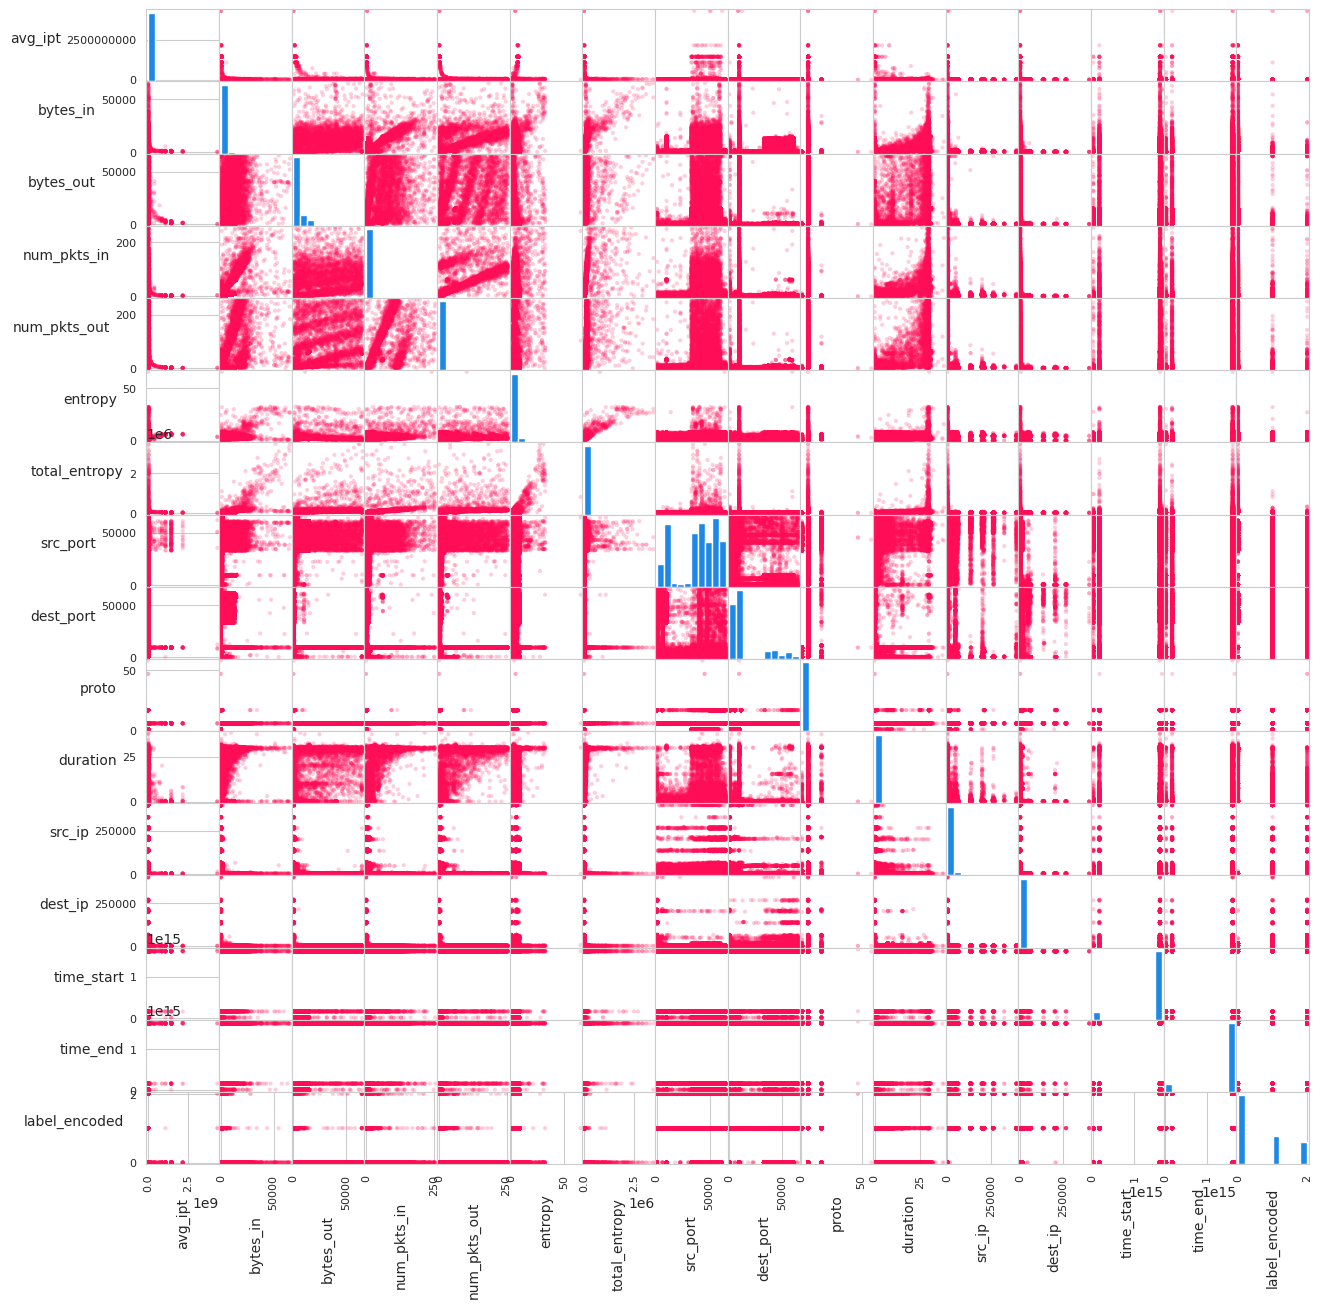

In [8]:
from pandas.plotting import scatter_matrix

axes = pd.plotting.scatter_matrix(df_global_data, figsize=(15, 15), c='#ff0d57', alpha=0.2, hist_kwds={'color':['#1E88E5']});
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

## parallel

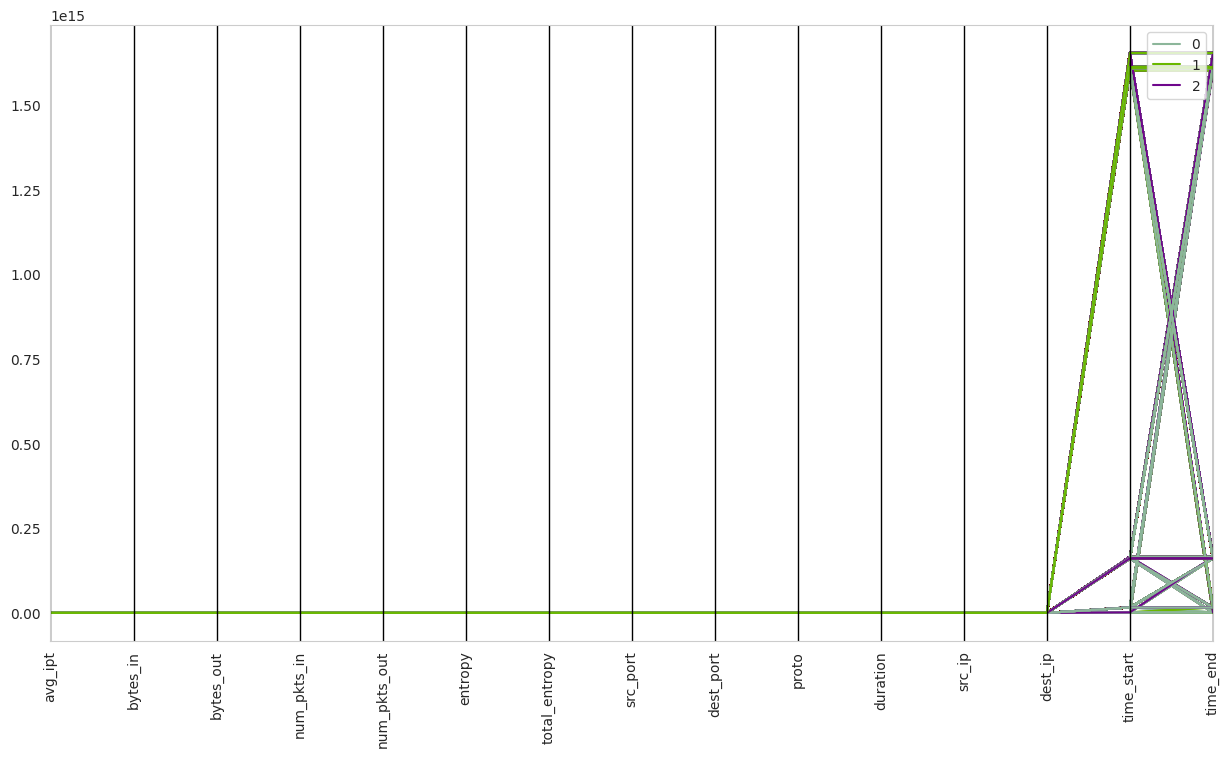

In [9]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

axes = parallel_coordinates(df_global_data, class_column='label_encoded')

# Get the figure object from the axes
fig = axes.get_figure()

# Increase the figure size for more space
fig.set_size_inches(15, 8)

# Rotate x-axis labels on the single axes object
axes.tick_params(axis='x', rotation=90)

plt.show()

## boxplot

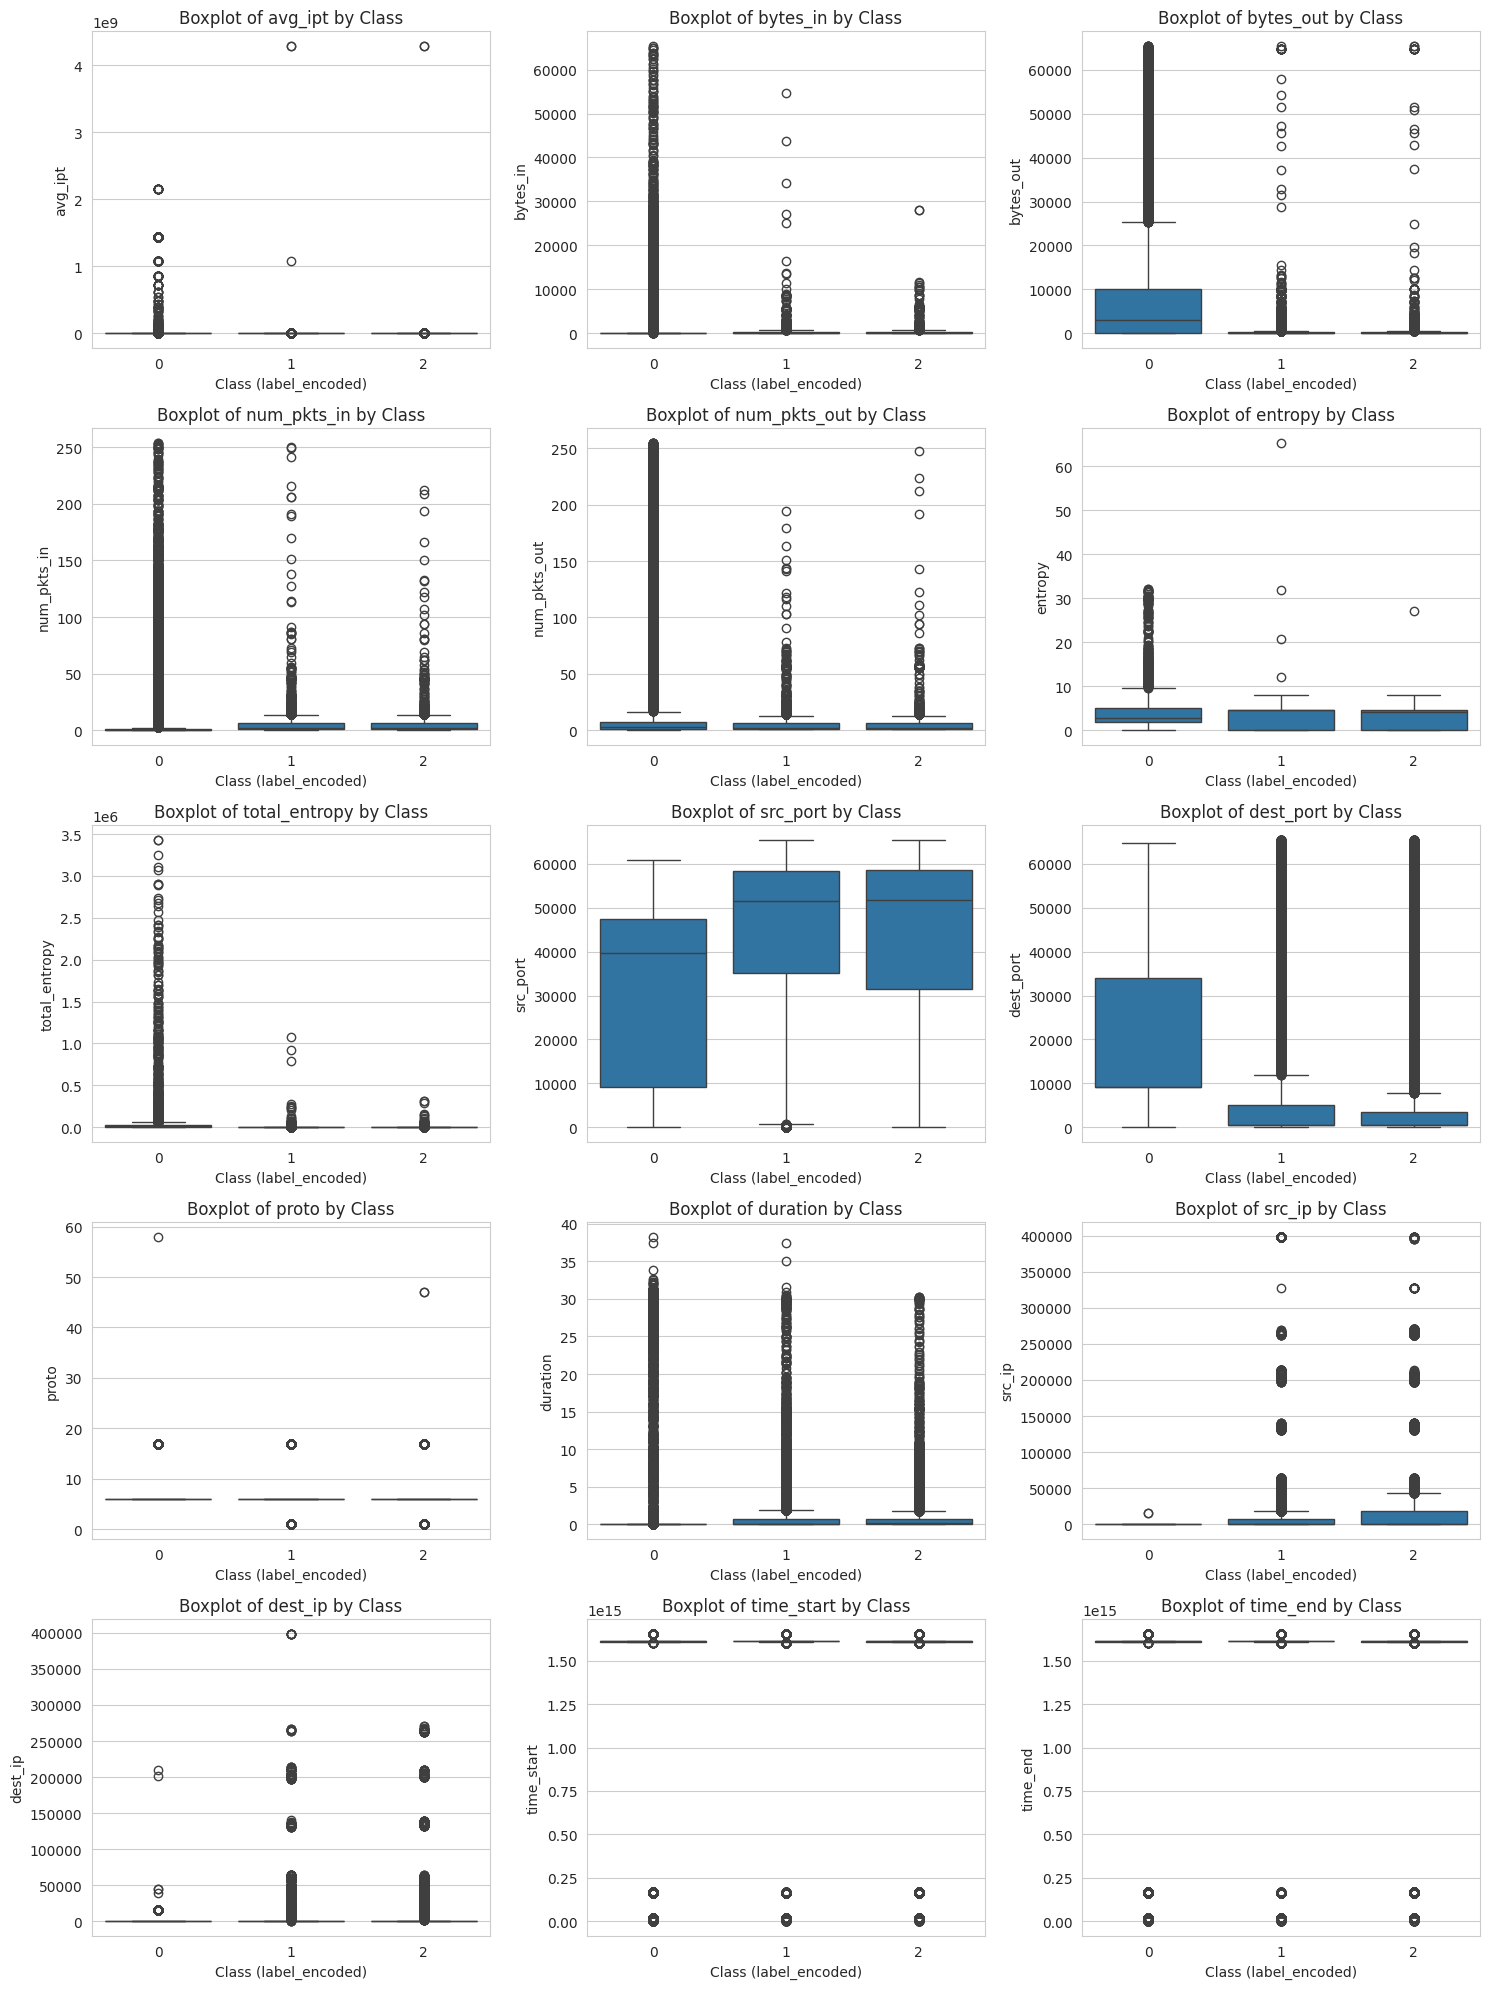

In [10]:
# Select numerical columns, excluding the target variable
numerical_cols = df_global_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('label_encoded')

# Determine the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create boxplots for each numerical column against the 'label_encoded'
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='label_encoded', y=col, data=df_global_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Class')
    axes[i].set_xlabel('Class (label_encoded)')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## analyze correlations


Correlation Matrix:


,avg_ipt,bytes_in,bytes_out,num_pkts_in,num_pkts_out,entropy,total_entropy,src_port,dest_port,proto,duration,src_ip,dest_ip,time_start,time_end,label_encoded
avg_ipt,1.000000,0.013783,0.004441,0.012767,0.008827,0.043071,0.017269,0.014169,-0.009707,-0.001734,0.014794,-0.007428,-0.002648,0.001692,-0.003234,-0.023736
bytes_in,0.013783,1.000000,0.366899,0.755744,0.636203,0.139359,0.595799,-0.060262,0.086471,-0.001975,0.633731,-0.026202,-0.014563,0.000755,-0.001634,-0.101493
bytes_out,0.004441,0.366899,1.000000,0.426267,0.572692,-0.020662,0.431059,0.178170,-0.144008,-0.019972,0.482523,-0.105731,-0.040900,0.004221,0.002062,-0.381132
num_pkts_in,0.012767,0.755744,0.426267,1.000000,0.774721,0.190309,0.506401,0.084693,-0.098660,-0.009963,0.800851,0.013731,-0.018421,0.001641,-0.000587,0.027096
num_pkts_out,0.008827,0.636203,0.572692,0.774721,1.000000,0.096289,0.446764,0.088750,-0.083753,-0.011286,0.784364,-0.022240,-0.019913,0.000867,0.002383,-0.094452
entropy,0.043071,0.139359,-0.020662,0.190309,0.096289,1.000000,0.257814,0.160208,-0.199244,0.097850,0.100911,-0.002731,-0.016810,0.002233,0.004314,-0.015290
total_entropy,0.017269,0.595799,0.431059,0.506401,0.446764,0.257814,1.000000,0.061045,-0.045719,-0.006219,0.420524,-0.043992,-0.018714,0.001127,-0.000477,-0.163414
src_port,0.014169,-0.060262,0.178170,0.084693,0.088750,0.160208,0.061045,1.000000,-0.757720,-0.047341,0.068871,0.120369,-0.141123,0.001341,0.001324,0.167205
dest_port,-0.009707,0.086471,-0.144008,-0.098660,-0.083753,-0.199244,-0.045719,-0.757720,1.000000,-0.025922,-0.072221,-0.137788,0.134712,-0.000441,-0.003737,-0.306432
proto,-0.001734,-0.001975,-0.019972,-0.009963,-0.011286,0.097850,-0.006219,-0.047341,-0.025922,1.000000,0.035262,0.003162,0.068348,-0.000639,-0.000295,0.017900


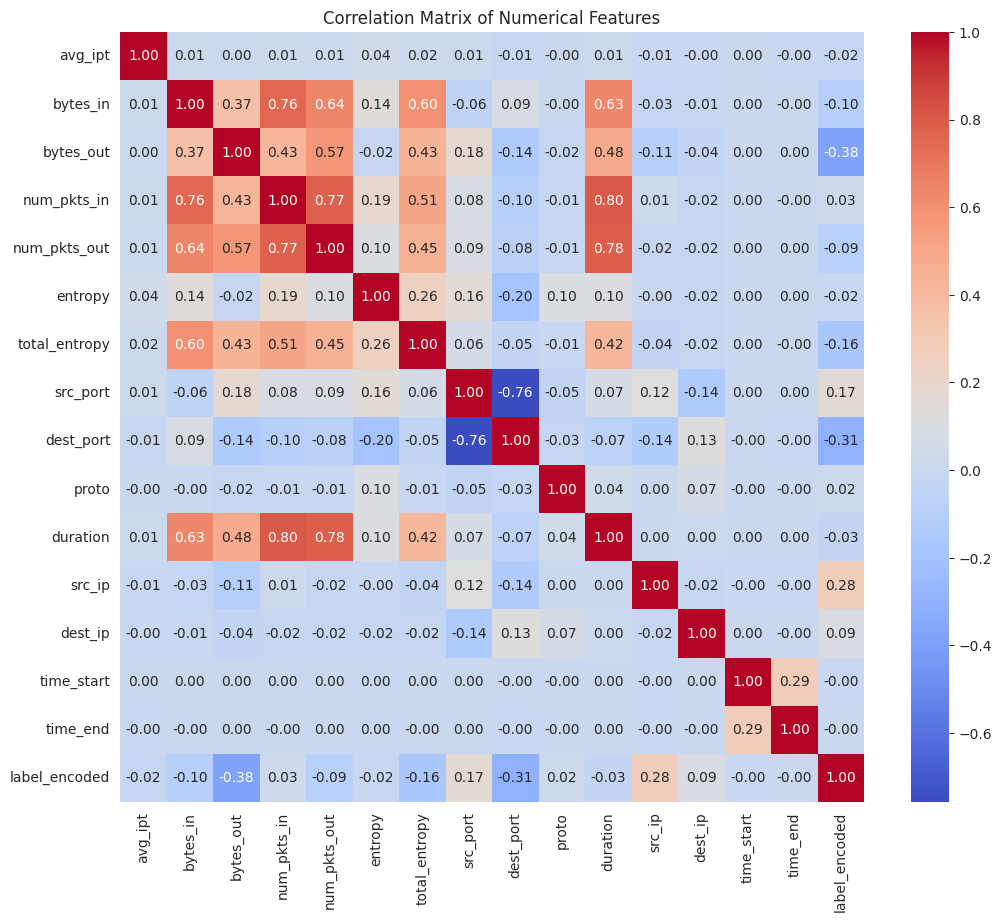

In [11]:
# Calculate the correlation matrix
correlation_matrix = df_global_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Top 15 features most correlated with the label:

bytes_out        0.381132
dest_port        0.306432
src_ip           0.276202
src_port         0.167205
total_entropy    0.163414
bytes_in         0.101493
num_pkts_out     0.094452
dest_ip          0.090402
duration         0.033110
num_pkts_in      0.027096
avg_ipt          0.023736
proto            0.017900
entropy          0.015290
time_start       0.003897
time_end         0.001407
Name: Label_encoded, dtype: float64


/tmp/ipython-input-2963278882.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")


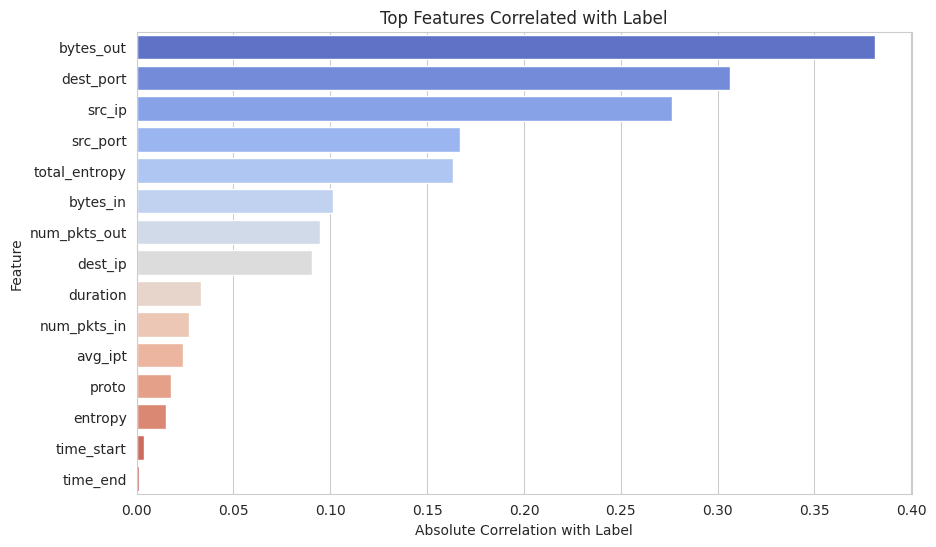

In [27]:
df = df_global_data.copy()

# Encode Label if it's categorical
if df['label_encoded'].dtype == 'object':
    df['Label_encoded'] = df['label_encoded'].astype('category').cat.codes
else:
    df['Label_encoded'] = df['label_encoded']

# Select numeric features, including Label_encoded
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns=['label_encoded'])


# If 'Label_encoded' is not in numeric_df, add it
if 'Label_encoded' not in numeric_df.columns:
    numeric_df['Label_encoded'] = df['Label_encoded']

# Correlation with encoded label
corr = numeric_df.corr()['Label_encoded'].abs().sort_values(ascending=False)

# Display top N correlated features (excluding Label itself)
top_features = corr.drop('Label_encoded').head(15)
print("Top 15 features most correlated with the label:\n")
print(top_features)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")
plt.title("Top Features Correlated with Label")
plt.xlabel("Absolute Correlation with Label")
plt.ylabel("Feature")
plt.show()

## feature importance using mutual information

Top 15 features based on Mutual Information:

dest_port        0.654549
src_port         0.614297
total_entropy    0.453410
bytes_out        0.450503
entropy          0.418469
time_end         0.377715
time_start       0.377529
duration         0.308512
bytes_in         0.276283
avg_ipt          0.208952
num_pkts_in      0.204556
src_ip           0.182283
num_pkts_out     0.140414
proto            0.041672
dest_ip          0.021686
dtype: float64


/tmp/ipython-input-248648452.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")


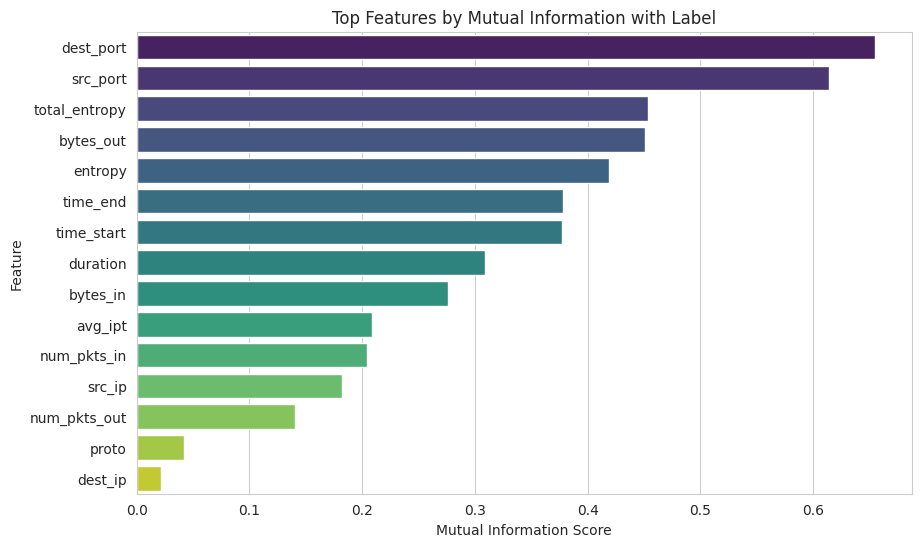

In [28]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['label_encoded', 'Label_encoded'])
y = df['Label_encoded']

# Select only numeric columns for X
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Compute mutual information
mi = mutual_info_classif(X_numeric, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X_numeric.columns).sort_values(ascending=False)

# Top N features
top_mi = mi_series.head(15)
print("Top 15 features based on Mutual Information:\n")
print(top_mi)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")
plt.title("Top Features by Mutual Information with Label")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

## ANOVA

Top 15 features based on ANOVA F-value:

bytes_out        21018.947396
dest_port        11953.678107
src_ip            8273.680526
src_port          3661.277798
total_entropy     3216.130256
bytes_in          1189.242521
num_pkts_out      1058.261018
dest_ip            856.421157
proto              166.410099
entropy            133.202754
duration           109.768444
num_pkts_in        102.049242
avg_ipt             68.251565
time_start           1.532841
time_end             0.951656
dtype: float64


/tmp/ipython-input-3480639865.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_f.values, y=top_f.index, palette="viridis")


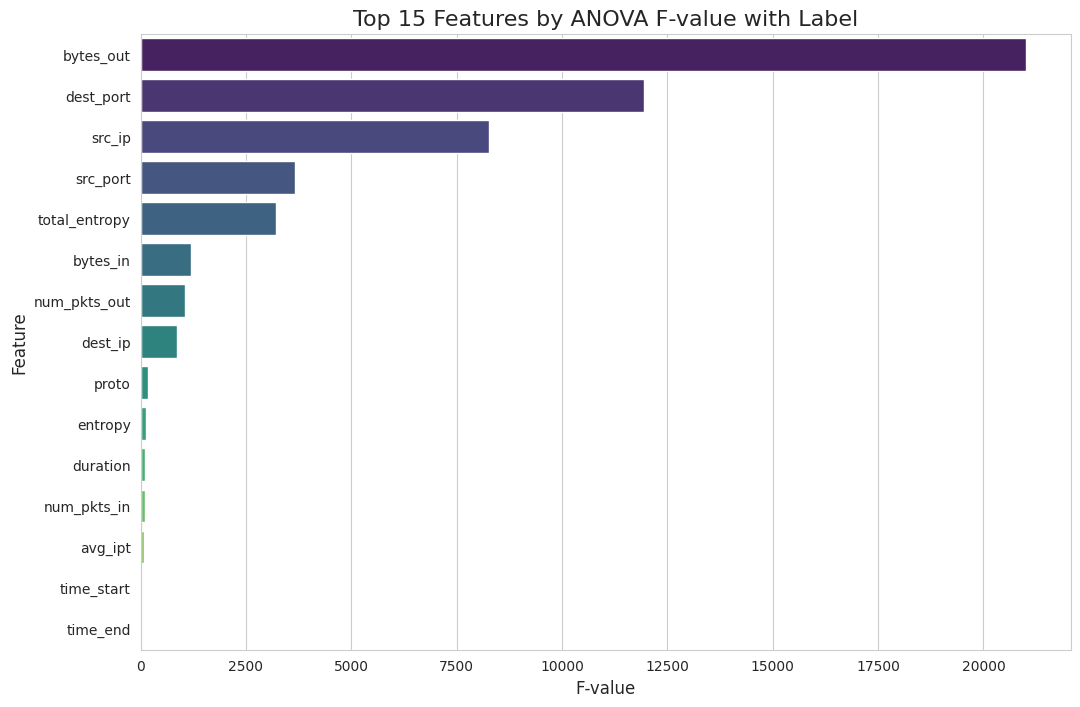

In [29]:
from sklearn.feature_selection import f_classif

X = df.drop(columns=['label_encoded', 'Label_encoded'])
y = df['Label_encoded']

# Select only numeric columns for X
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Compute the F-value and p-value for each feature
f_values, p_values = f_classif(X_numeric, y)

# Create a Series and sort
f_series = pd.Series(f_values, index=X_numeric.columns).sort_values(ascending=False)

# Print and plot the top features
top_f = f_series.head(15)
print("Top 15 features based on ANOVA F-value:\n")
print(top_f)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_f.values, y=top_f.index, palette="viridis")
plt.title("Top 15 Features by ANOVA F-value with Label", fontsize=16)
plt.xlabel("F-value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


# with scaled data

### Load the dataset

### Subtask:
Load the dataset from the specified path into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the CSV file into a DataFrame.



In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [15]:
import pandas as pd

df_global_data = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/global_data.csv")

### Display Basic Information

Display the first few rows, column names and their data types, and basic statistics of the dataset.

In [ ]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(df_global_data.head())

# Display column names and their data types
print("\nColumn names and their data types:")
display(df_global_data.info())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
display(df_global_data.describe())

First 5 rows of the DataFrame:


,avg_ipt,bytes_in,bytes_out,num_pkts_in,num_pkts_out,entropy,total_entropy,src_port,dest_port,proto,duration,src_ip,dest_ip,time_start,time_end,label_encoded
0,-0.034063,-0.198464,-0.521970,-0.261112,-0.284016,-1.302101,-0.239583,-1.518713,1.086840,-0.04713,-0.139679,-0.218937,-0.078514,0.332131,0.332248,0
1,-0.034063,-0.198464,1.710874,-0.261112,0.241871,-0.401739,0.350688,0.231615,-0.272775,-0.04713,-0.139659,-0.218937,-0.078514,0.327224,0.327342,0
2,-0.034063,-0.198464,-0.500382,-0.261112,-0.225584,0.387283,-0.228875,0.900498,-0.775411,-0.04713,-0.139559,-0.218937,-0.078514,0.332324,0.332441,1
3,-0.034060,-0.090518,-0.492517,0.319441,0.008144,0.669043,-0.198441,0.544709,-0.775411,-0.04713,0.075428,-0.218937,-0.078514,-2.964871,-3.293513,1
4,-0.034063,-0.198464,-0.008632,-0.261112,-0.167152,0.800991,0.077401,-0.012531,-0.272775,-0.04713,-0.139678,-0.218937,-0.078514,0.332325,0.332442,0



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        200000 non-null  float64
 1   bytes_in       200000 non-null  float64
 2   bytes_out      200000 non-null  float64
 3   num_pkts_in    200000 non-null  float64
 4   num_pkts_out   200000 non-null  float64
 5   entropy        200000 non-null  float64
 6   total_entropy  200000 non-null  float64
 7   src_port       200000 non-null  float64
 8   dest_port      200000 non-null  float64
 9   proto          200000 non-null  float64
 10  duration       200000 non-null  float64
 11  src_ip         200000 non-null  float64
 12  dest_ip        200000 non-null  float64
 13  time_start     200000 non-null  float64
 14  time_end       200000 non-null  float64
 15  label_encoded  200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage:

None


Basic statistics of the dataset:


,avg_ipt,bytes_in,bytes_out,num_pkts_in,num_pkts_out,entropy,total_entropy,src_port,dest_port,proto,duration,src_ip,dest_ip,time_start,time_end,label_encoded
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.002593,-0.001620,-0.002033,-0.002080,-0.000806,-0.000075,-0.002093,-0.001989,0.004523,0.002744,-0.001339,-0.002442,0.002382,0.000568,0.002020,0.610045
std,1.048563,0.998818,0.997496,0.988119,1.000624,0.998617,0.963715,1.002000,1.003468,1.005375,0.699642,0.988376,1.006100,0.999391,0.997298,0.783539
min,-0.034063,-0.198464,-0.521970,-0.261112,-0.342448,-1.302101,-0.239583,-1.991335,-0.800901,-3.870049,-0.139679,-0.249460,-0.141043,-3.331231,-3.330106,0.000000
25%,-0.034063,-0.198464,-0.521970,-0.261112,-0.284016,-1.302101,-0.239583,-0.541552,-0.775411,-0.047130,-0.139679,-0.218937,-0.078514,0.327824,0.327942,0.000000
50%,-0.034063,-0.198464,-0.492517,-0.261112,-0.167152,0.085370,-0.198344,0.231923,-0.272775,-0.047130,-0.139659,-0.218937,-0.078514,0.330309,0.330424,0.000000
75%,-0.034063,-0.162882,0.147883,-0.012303,0.008144,0.691368,0.195104,0.782022,-0.272775,-0.047130,-0.131722,-0.218937,-0.078514,0.332916,0.333034,1.000000
max,91.469864,25.960566,9.579334,20.804670,14.557674,26.882242,66.752660,1.375637,2.961435,39.711235,6.972111,15.313560,43.045790,0.430066,0.430156,2.000000


### Visualize Data Distributions

Create visualizations to understand the distribution of key features.

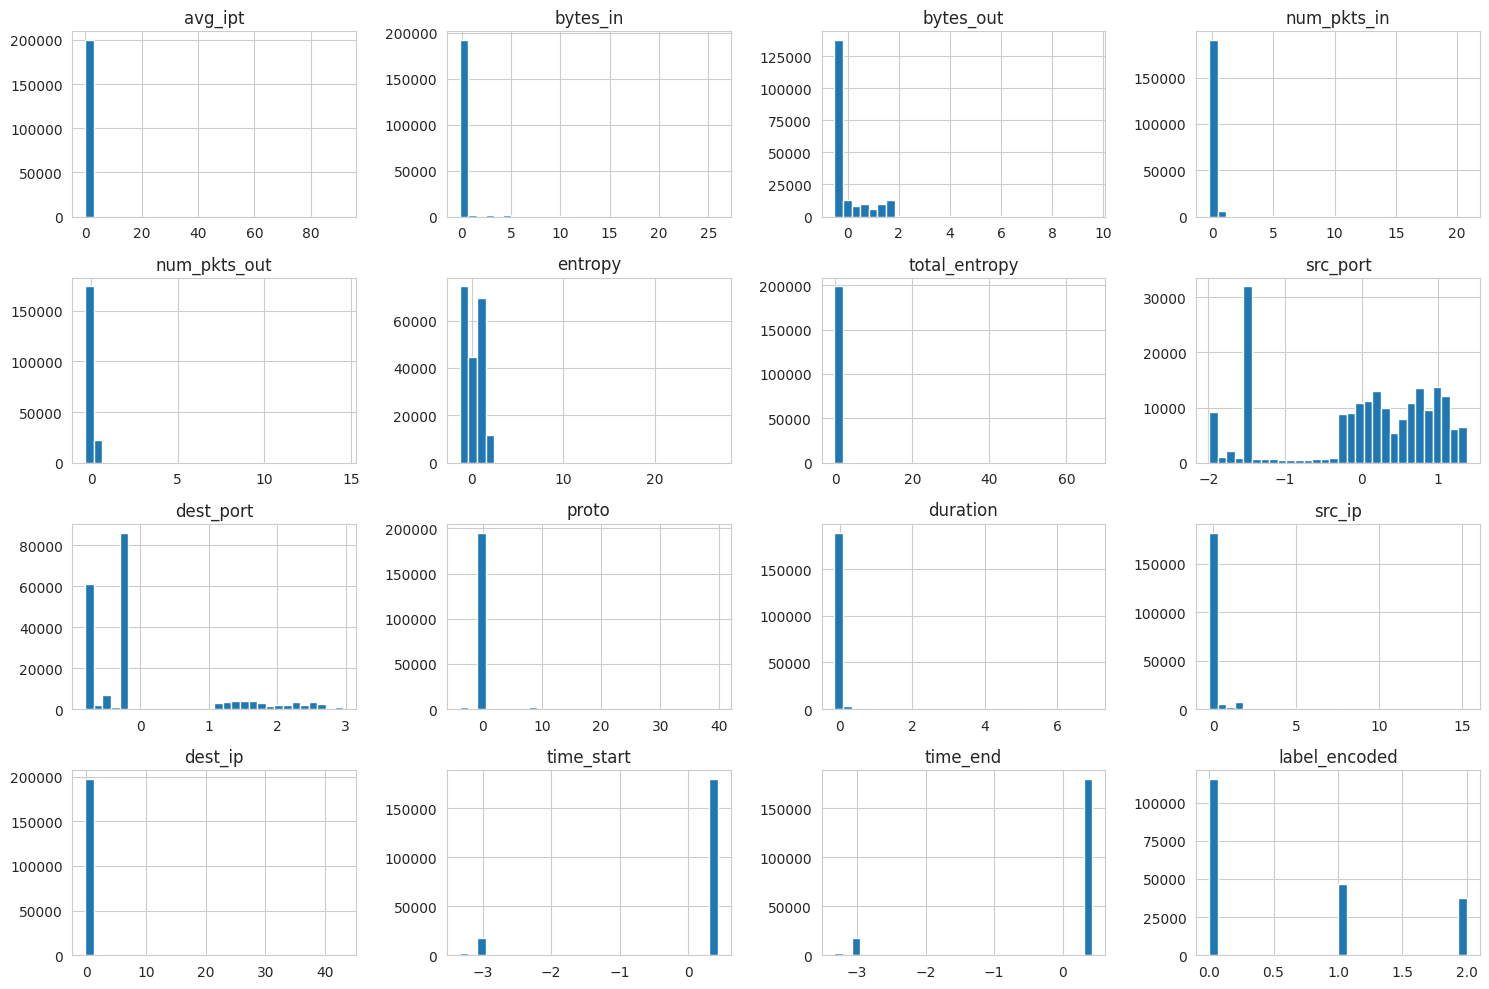

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for plotting
numerical_cols = df_global_data.select_dtypes(include=['float64', 'int64']).columns

# Set the style for the plots
sns.set_style("whitegrid")

# Plot histograms for numerical columns
df_global_data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Scatter Matrix Plot

Create a scatter matrix plot to visualize the relationships between numerical features.

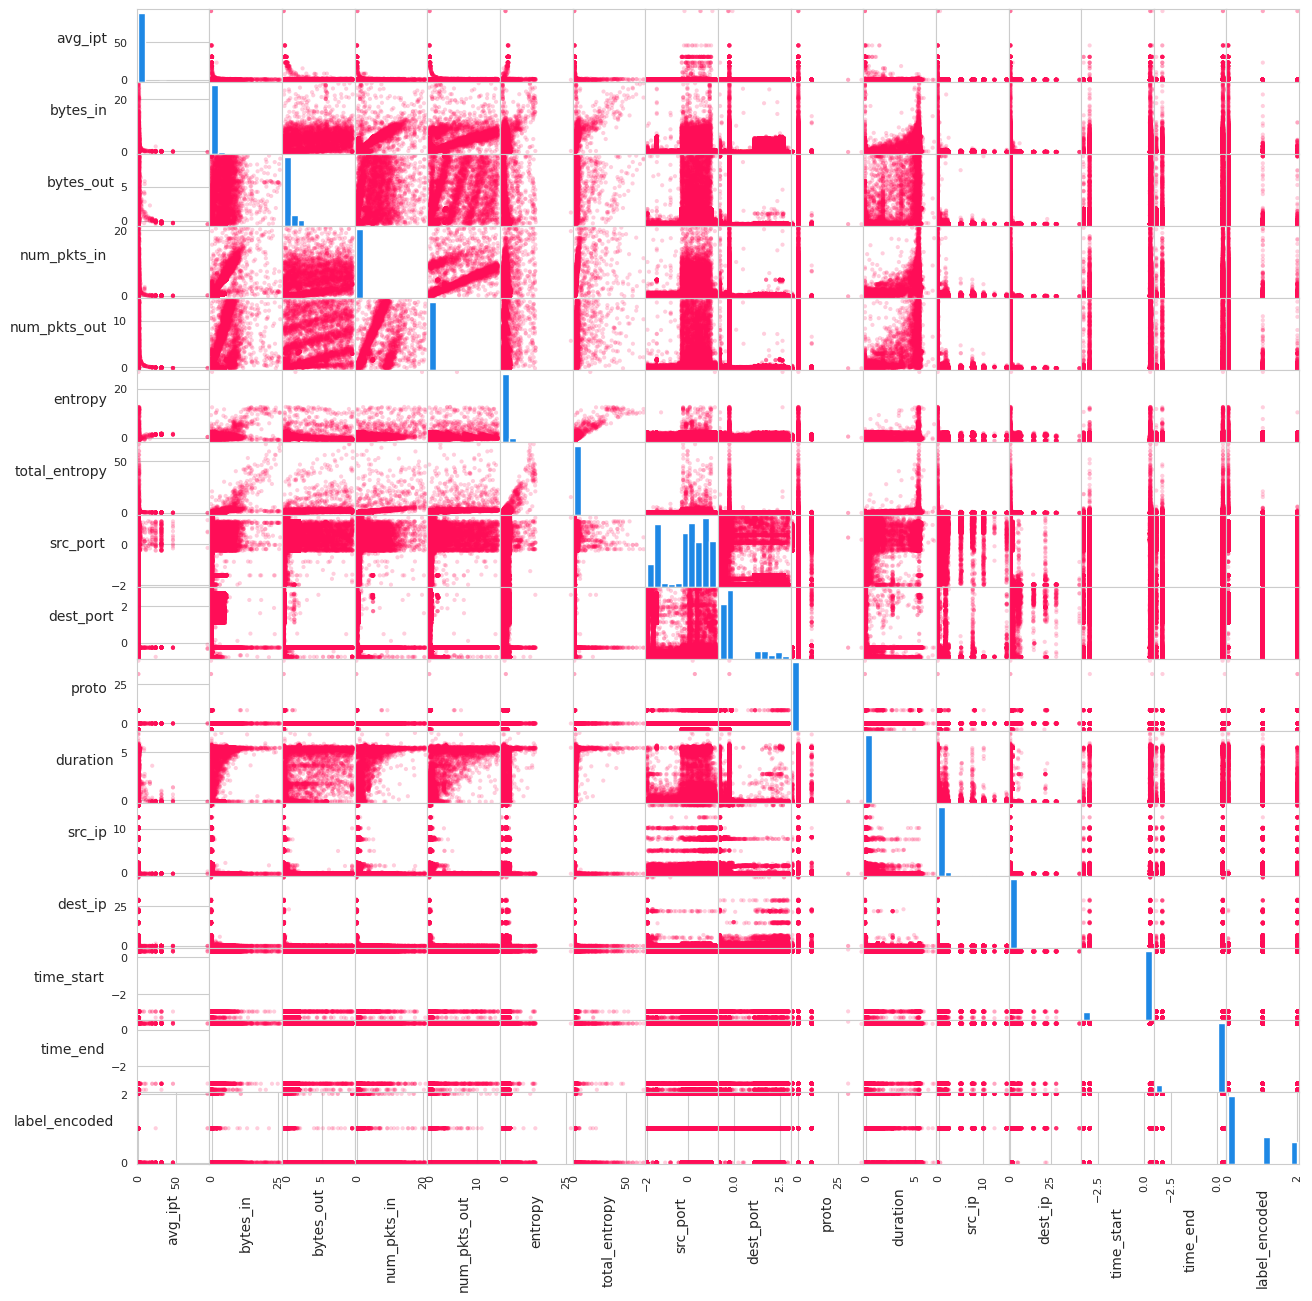

In [ ]:
from pandas.plotting import scatter_matrix

axes = pd.plotting.scatter_matrix(df_global_data, figsize=(15, 15), c='#ff0d57', alpha=0.2, hist_kwds={'color':['#1E88E5']});
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

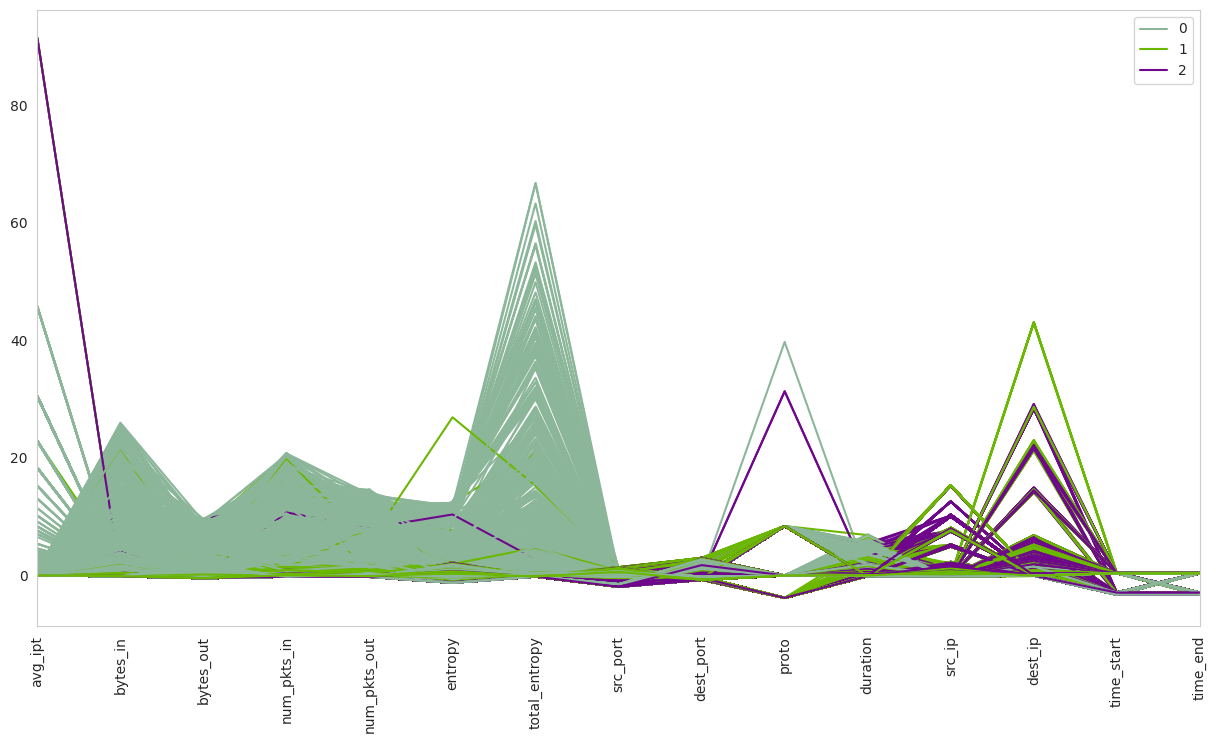

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

axes = parallel_coordinates(df_global_data, class_column='label_encoded', axvlines=False)

# Get the figure object from the axes
fig = axes.get_figure()

# Increase the figure size for more space
fig.set_size_inches(15, 8)

# Rotate x-axis labels on the single axes object
axes.tick_params(axis='x', rotation=90)

plt.show()

### Boxplots by Class

Create boxplots for each numerical feature, grouped by the `label_encoded` class.

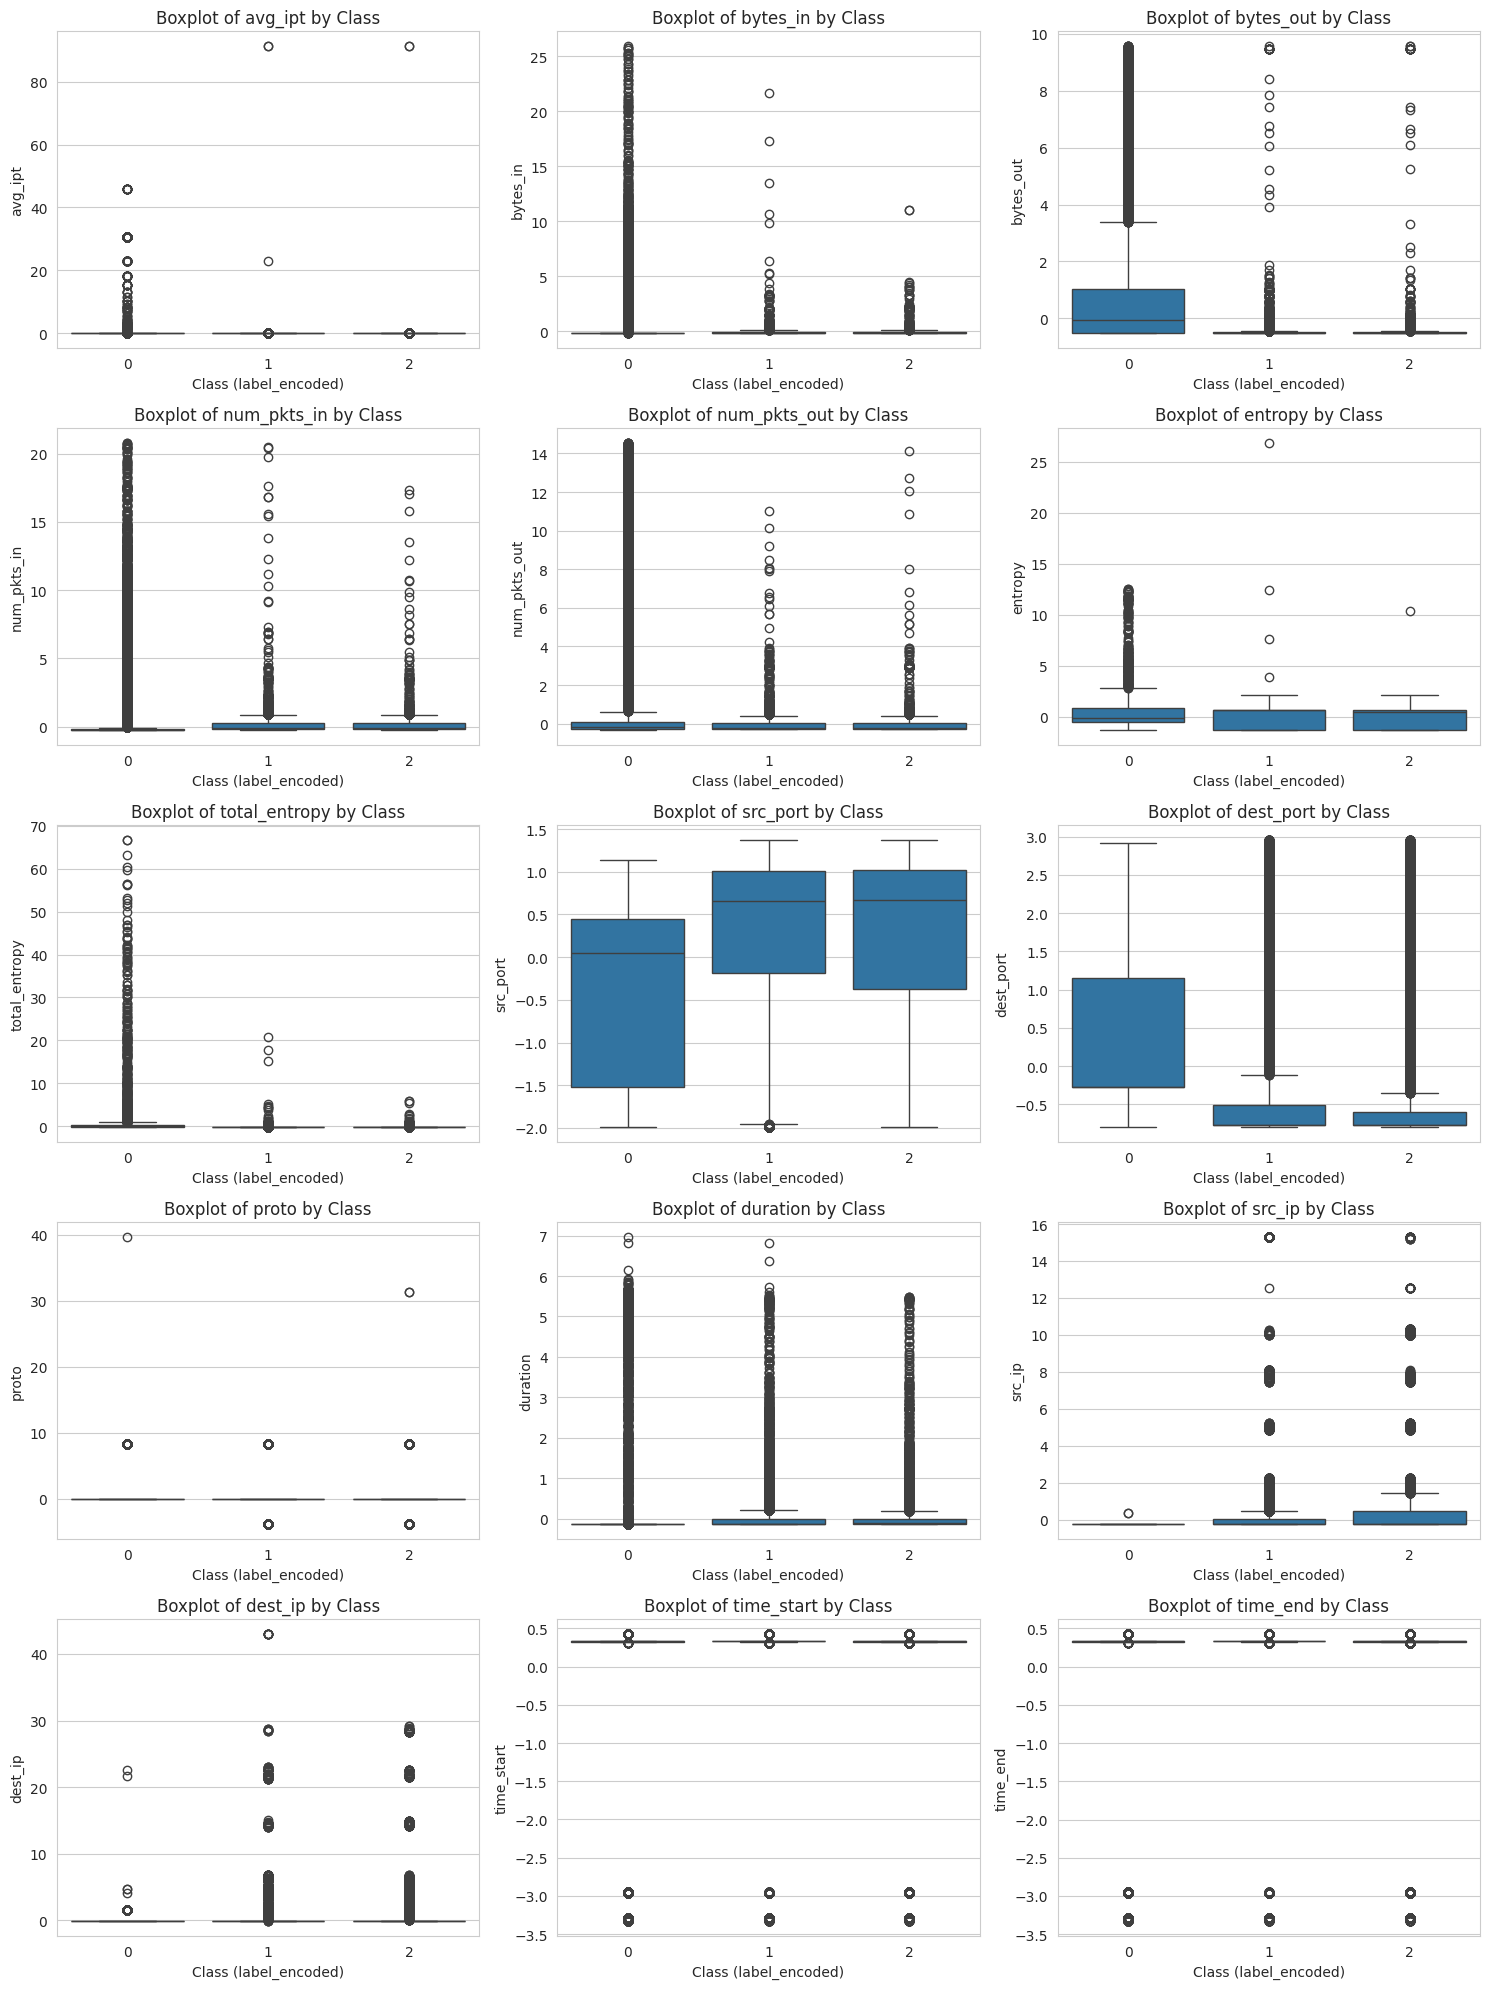

In [ ]:
# Select numerical columns, excluding the target variable
numerical_cols = df_global_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('label_encoded')

# Determine the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create boxplots for each numerical column against the 'label_encoded'
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='label_encoded', y=col, data=df_global_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Class')
    axes[i].set_xlabel('Class (label_encoded)')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Analyze Correlations

Examine correlations between numerical features.


Correlation Matrix:


,avg_ipt,bytes_in,bytes_out,num_pkts_in,num_pkts_out,entropy,total_entropy,src_port,dest_port,proto,duration,src_ip,dest_ip,time_start,time_end,label_encoded
avg_ipt,1.000000,0.013783,0.004441,0.012767,0.008827,0.043071,0.017269,0.014169,-0.009707,-0.001734,0.014794,-0.007428,-0.002648,0.001692,-0.003234,-0.023736
bytes_in,0.013783,1.000000,0.366899,0.755744,0.636203,0.139359,0.595799,-0.060262,0.086471,-0.001975,0.633731,-0.026202,-0.014563,0.000755,-0.001634,-0.101493
bytes_out,0.004441,0.366899,1.000000,0.426267,0.572692,-0.020662,0.431059,0.178170,-0.144008,-0.019972,0.482523,-0.105731,-0.040900,0.004221,0.002062,-0.381132
num_pkts_in,0.012767,0.755744,0.426267,1.000000,0.774721,0.190309,0.506401,0.084693,-0.098660,-0.009963,0.800851,0.013731,-0.018421,0.001641,-0.000587,0.027096
num_pkts_out,0.008827,0.636203,0.572692,0.774721,1.000000,0.096289,0.446764,0.088750,-0.083753,-0.011286,0.784364,-0.022240,-0.019913,0.000867,0.002383,-0.094452
entropy,0.043071,0.139359,-0.020662,0.190309,0.096289,1.000000,0.257814,0.160208,-0.199244,0.097850,0.100911,-0.002731,-0.016810,0.002233,0.004314,-0.015290
total_entropy,0.017269,0.595799,0.431059,0.506401,0.446764,0.257814,1.000000,0.061045,-0.045719,-0.006219,0.420524,-0.043992,-0.018714,0.001127,-0.000477,-0.163414
src_port,0.014169,-0.060262,0.178170,0.084693,0.088750,0.160208,0.061045,1.000000,-0.757720,-0.047341,0.068871,0.120369,-0.141123,0.001341,0.001324,0.167205
dest_port,-0.009707,0.086471,-0.144008,-0.098660,-0.083753,-0.199244,-0.045719,-0.757720,1.000000,-0.025922,-0.072221,-0.137788,0.134712,-0.000441,-0.003737,-0.306432
proto,-0.001734,-0.001975,-0.019972,-0.009963,-0.011286,0.097850,-0.006219,-0.047341,-0.025922,1.000000,0.035262,0.003162,0.068348,-0.000639,-0.000295,0.017900


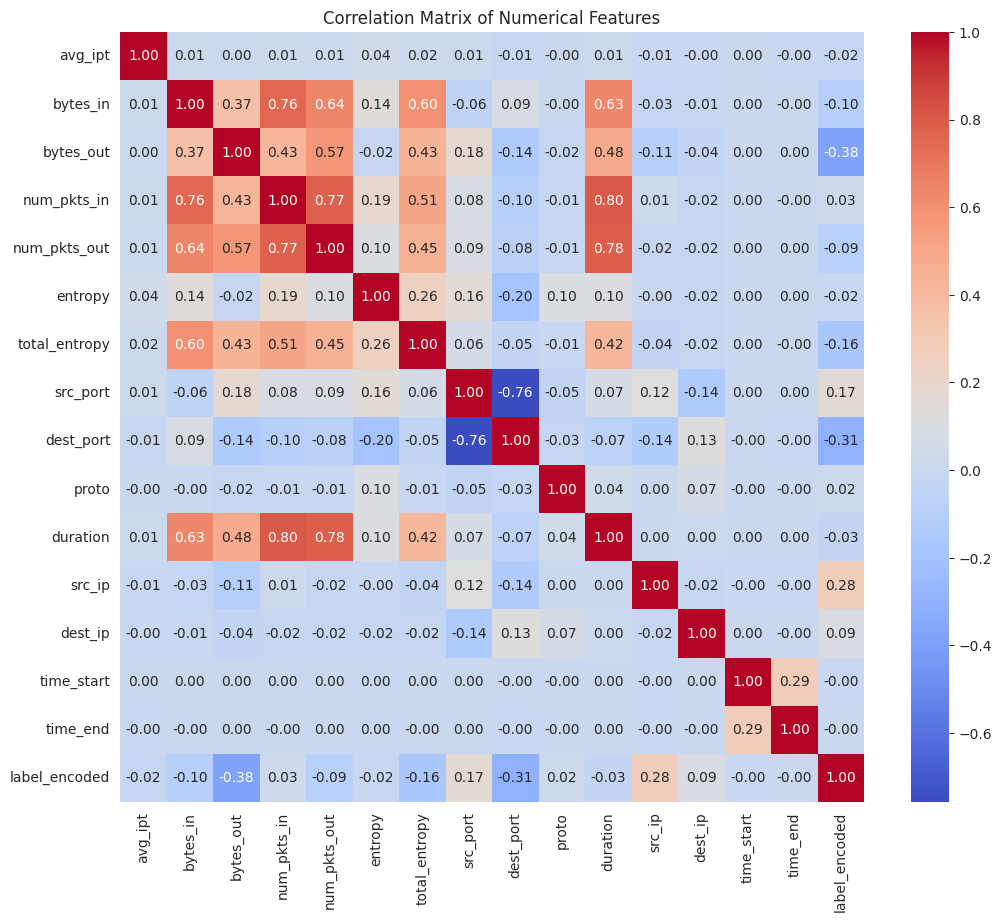

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_global_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=correlation_matrix)

https://docs.google.com/spreadsheets/d/1O5JmUfYzxj9Eu2DF76_WSVLVQKuz6TElpvPcAavSmo0/edit#gid=0


    avg_ipt  bytes_in  bytes_out  num_pkts_in  num_pkts_out   entropy  \
0 -0.034063 -0.198464  -0.521970    -0.261112     -0.284016 -1.302101   
1 -0.034063 -0.198464   1.710874    -0.261112      0.241871 -0.401739   
2 -0.034063 -0.198464  -0.500382    -0.261112     -0.225584  0.387283   
3 -0.034060 -0.090518  -0.492517     0.319441      0.008144  0.669043   
4 -0.034063 -0.198464  -0.008632    -0.261112     -0.167152  0.800991   

   total_entropy  src_port  dest_port    proto  duration    src_ip   dest_ip  \
0      -0.239583 -1.518713   1.086840 -0.04713 -0.139679 -0.218937 -0.078514   
1       0.350688  0.231615  -0.272775 -0.04713 -0.139659 -0.218937 -0.078514   
2      -0.228875  0.900498  -0.775411 -0.04713 -0.139559 -0.218937 -0.078514   
3      -0.198441  0.544709  -0.775411 -0.04713  0.075428 -0.218937 -0.078514   
4       0.077401 -0.012531  -0.272775 -0.04713 -0.139678 -0.218937 -0.078514   

   time_start  time_end  label_encoded  
0    0.332131  0.332248              0 

/tmp/ipython-input-3655048850.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")


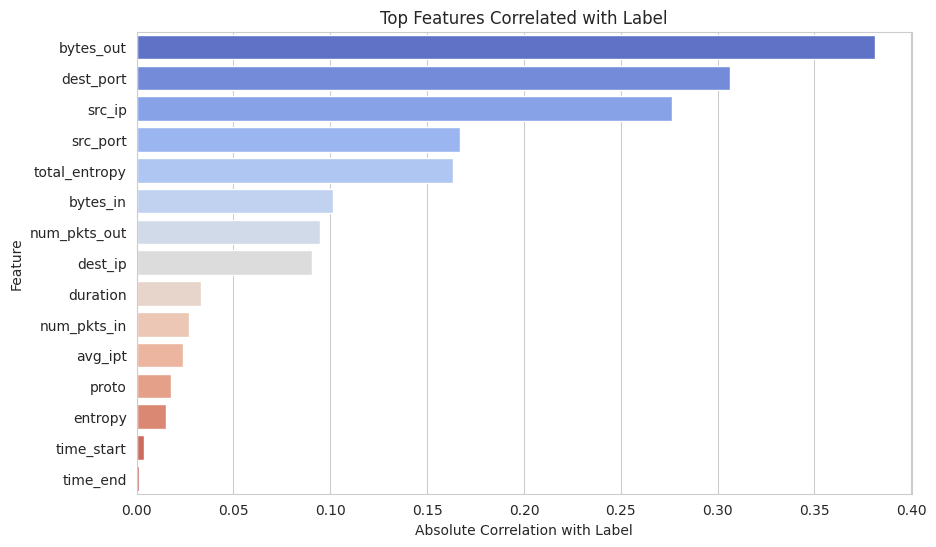

In [17]:
df = df_global_data.copy()
print(df.head())
# Encode Label if it's categorical
if df['label_encoded'].dtype == 'object':
    df['Label_encoded'] = df['label_encoded'].astype('category').cat.codes
else:
    df['Label_encoded'] = df['label_encoded']

# Select numeric features, including Label_encoded
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns=['label_encoded'])


# If 'Label_encoded' is not in numeric_df, add it
if 'Label_encoded' not in numeric_df.columns:
    numeric_df['Label_encoded'] = df['Label_encoded']

# Correlation with encoded label
corr = numeric_df.corr()['Label_encoded'].abs().sort_values(ascending=False)

# Display top N correlated features (excluding Label itself)
top_features = corr.drop('Label_encoded').head(15)
print("Top 15 features most correlated with the label:\n")
print(top_features)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")
plt.title("Top Features Correlated with Label")
plt.xlabel("Absolute Correlation with Label")
plt.ylabel("Feature")
plt.show()

Top 15 features based on Mutual Information:

dest_port        0.653510
src_port         0.615744
total_entropy    0.452328
bytes_out        0.450696
entropy          0.420643
time_start       0.377186
time_end         0.376473
duration         0.309282
bytes_in         0.277825
avg_ipt          0.208523
num_pkts_in      0.207286
src_ip           0.186370
num_pkts_out     0.138827
dest_ip          0.021489
proto            0.018013
dtype: float64


/tmp/ipython-input-248648452.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")


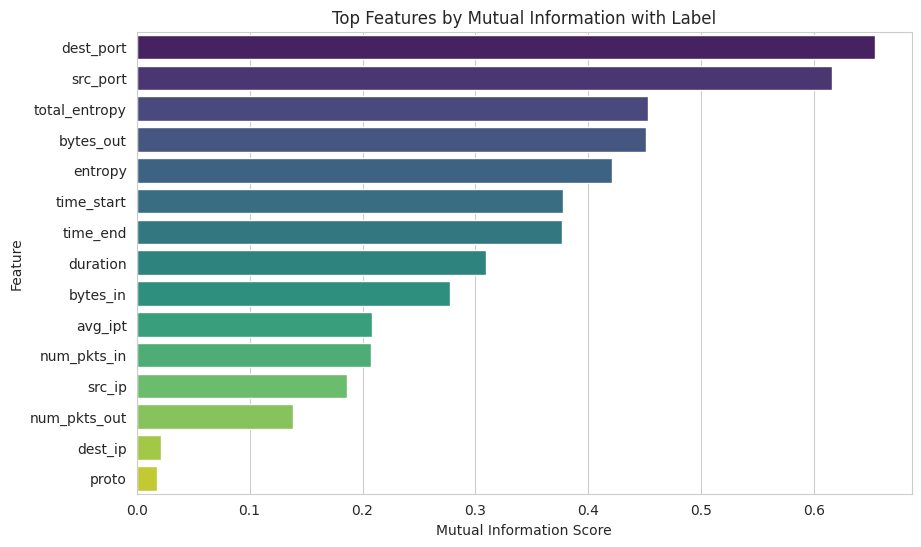

In [18]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['label_encoded', 'Label_encoded'])
y = df['Label_encoded']

# Select only numeric columns for X
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Compute mutual information
mi = mutual_info_classif(X_numeric, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X_numeric.columns).sort_values(ascending=False)

# Top N features
top_mi = mi_series.head(15)
print("Top 15 features based on Mutual Information:\n")
print(top_mi)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")
plt.title("Top Features by Mutual Information with Label")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

## Filter Methods (Univariate Statistics)
These methods evaluate the relevance of each feature independently with respect to the target variable. They are fast and computationally inexpensive, making them great for EDA.

ANOVA F-value (f_classif)
The f_classif function from scikit-learn performs an Analysis of Variance (ANOVA). It tests whether the means of the groups (defined by your class labels) are significantly different from each other for a given numerical feature. A high F-value indicates that a feature is a good predictor for the target.

Top 15 features based on ANOVA F-value:

bytes_out        21018.947396
dest_port        11953.678107
src_ip            8273.680526
src_port          3661.277798
total_entropy     3216.130256
bytes_in          1189.242521
num_pkts_out      1058.261018
dest_ip            856.421157
proto              166.410099
entropy            133.202754
duration           109.768444
num_pkts_in        102.049242
avg_ipt             68.251565
time_start           1.532841
time_end             0.951656
dtype: float64


/tmp/ipython-input-1505362372.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_f.values, y=top_f.index, palette="viridis")


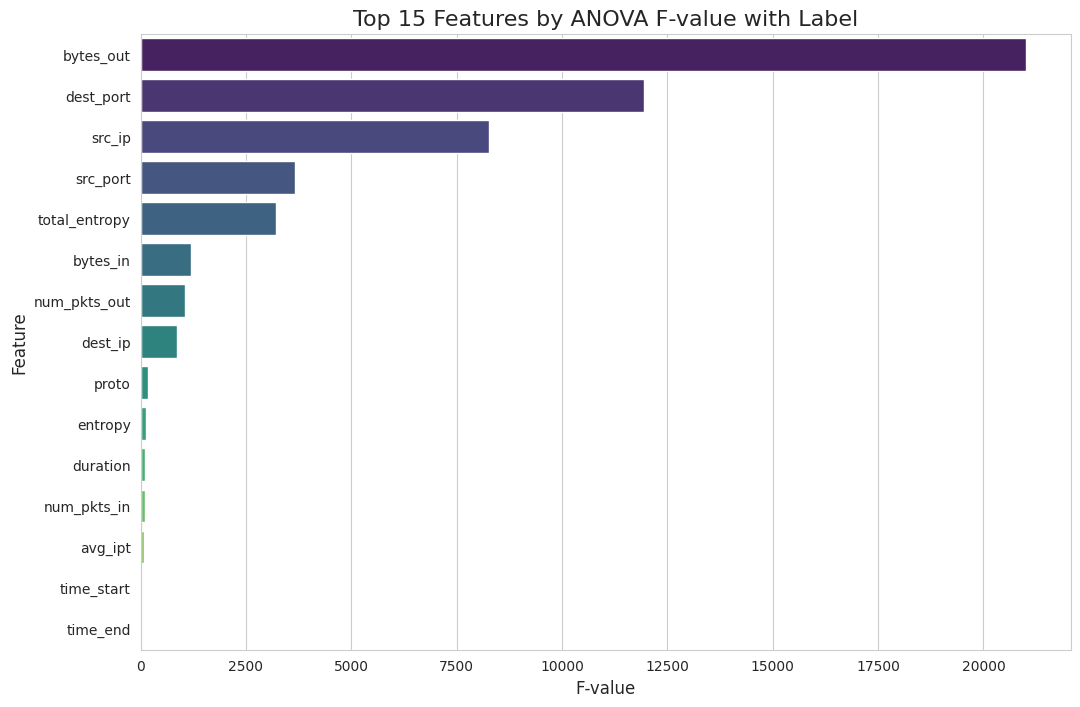

In [23]:
from sklearn.feature_selection import f_classif

# Compute the F-value and p-value for each feature
f_values, p_values = f_classif(X_numeric, y)

# Create a Series and sort
f_series = pd.Series(f_values, index=X_numeric.columns).sort_values(ascending=False)

# Print and plot the top features
top_f = f_series.head(15)
print("Top 15 features based on ANOVA F-value:\n")
print(top_f)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_f.values, y=top_f.index, palette="viridis")
plt.title("Top 15 Features by ANOVA F-value with Label", fontsize=16)
plt.xlabel("F-value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()